In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Selected dataset:
# Shunyi(顺义)，Changping(昌平)，Huairou(怀柔)，Aotizhongxin(奥体)，(Tiantan)天坛


# first test with Shunyi data 
data = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv', index_col=['No'])
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi


In [3]:
# let's focus on PM2.5
data2 = data.drop(columns=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'station'])
data2

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,,,,,,,,,,,
1,2013,3,1,0,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2,2013,3,1,1,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4
3,2013,3,1,2,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6
4,2013,3,1,3,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6
5,2013,3,1,4,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,10.3,1014.2,-12.4,0.0,W,1.8
35061,2017,2,28,20,47.0,9.8,1014.5,-9.9,0.0,NW,1.5
35062,2017,2,28,21,18.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [4]:
# interpolate NA
data2['PM2.5'] = data2['PM2.5'].interpolate()
data3 = data2.copy()
data3

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,,,,,,,,,,,
1,2013,3,1,0,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2,2013,3,1,1,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4
3,2013,3,1,2,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6
4,2013,3,1,3,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6
5,2013,3,1,4,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,10.3,1014.2,-12.4,0.0,W,1.8
35061,2017,2,28,20,47.0,9.8,1014.5,-9.9,0.0,NW,1.5
35062,2017,2,28,21,18.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [5]:
# validate there is no NA
data3[data3['PM2.5'].isnull() == True]

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,,,,,,,,,,,


In [6]:
# combine year month day hour together
def padding(x):
    """Padding function for month/day/hour (e.g. 1 -> 01)
    :param x:original month/day (single/double digit, int)
    :return string of month/day (double digit)
    """
    return str(x) if x >= 10 else '0' + str(x)

data3['date'] = data3.apply(lambda x: str(x.year)+'-'+padding(x.month)+'-'+padding(x.day)+' '+padding(x.hour)+':00:00', axis=1)
data3

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,date
No,,,,,,,,,,,,
1,2013,3,1,0,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3,2013-03-01 00:00:00
2,2013,3,1,1,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4,2013-03-01 01:00:00
3,2013,3,1,2,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6,2013-03-01 02:00:00
4,2013,3,1,3,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6,2013-03-01 03:00:00
5,2013,3,1,4,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,10.3,1014.2,-12.4,0.0,W,1.8,2017-02-28 19:00:00
35061,2017,2,28,20,47.0,9.8,1014.5,-9.9,0.0,NW,1.5,2017-02-28 20:00:00
35062,2017,2,28,21,18.0,9.1,1014.6,-12.7,0.0,NE,1.7,2017-02-28 21:00:00


In [7]:
# drop 'year', 'month', 'day', 'hour'
data4 = data3.drop(columns=['year', 'month', 'day', 'hour'])
data4

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,date
No,,,,,,,,
1,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3,2013-03-01 00:00:00
2,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4,2013-03-01 01:00:00
3,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6,2013-03-01 02:00:00
4,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6,2013-03-01 03:00:00
5,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...
35060,27.0,10.3,1014.2,-12.4,0.0,W,1.8,2017-02-28 19:00:00
35061,47.0,9.8,1014.5,-9.9,0.0,NW,1.5,2017-02-28 20:00:00
35062,18.0,9.1,1014.6,-12.7,0.0,NE,1.7,2017-02-28 21:00:00


In [8]:
# convert date string to datetime 
data4['date'] = pd.to_datetime(data4['date'])
data4.date

No
1       2013-03-01 00:00:00
2       2013-03-01 01:00:00
3       2013-03-01 02:00:00
4       2013-03-01 03:00:00
5       2013-03-01 04:00:00
                ...        
35060   2017-02-28 19:00:00
35061   2017-02-28 20:00:00
35062   2017-02-28 21:00:00
35063   2017-02-28 22:00:00
35064   2017-02-28 23:00:00
Name: date, Length: 35064, dtype: datetime64[ns]

In [9]:
# reset index
data4 = data4.set_index(["date"])
data4

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,
2013-03-01 00:00:00,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,10.3,1014.2,-12.4,0.0,W,1.8
2017-02-28 20:00:00,47.0,9.8,1014.5,-9.9,0.0,NW,1.5
2017-02-28 21:00:00,18.0,9.1,1014.6,-12.7,0.0,NE,1.7


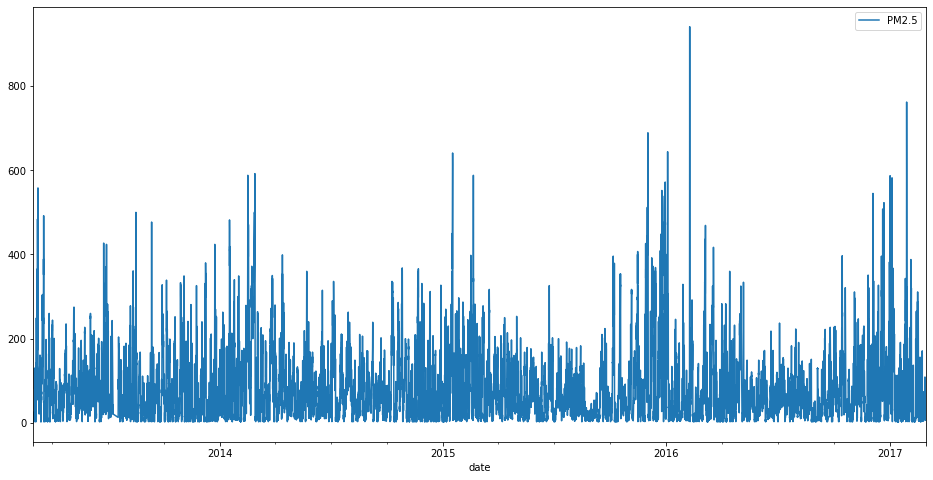

In [10]:
# see how pm2.5 change with time

data5 = data4.drop(['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], axis=1)
data5.plot(figsize=(16,8))

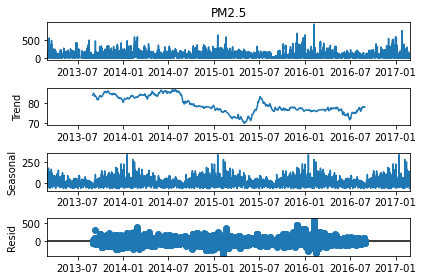

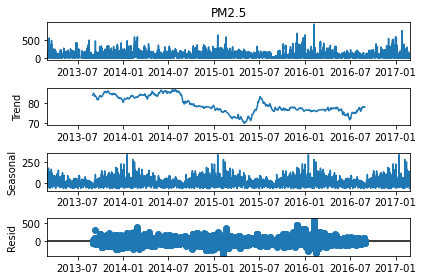

In [11]:
# seems like it has some seasonality?

from statsmodels.tsa.seasonal import seasonal_decompose
# period is 24*365 = 8760
decomposeResult = seasonal_decompose(data5['PM2.5'], period = 8760)
decomposeResult.plot()

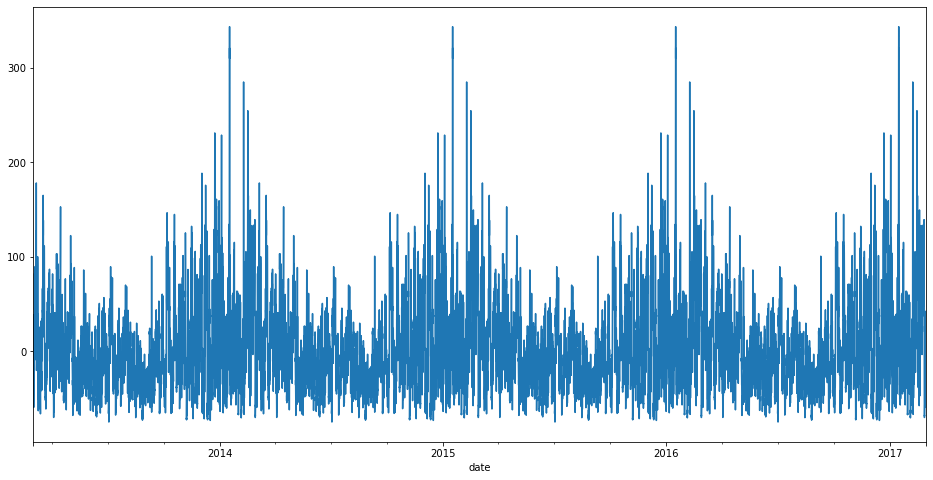

In [12]:
decomposeResult.seasonal.plot(figsize=(16,8))

In [13]:
# seems like PM2.5 is higher in winter period, which is reasonable.(heating)

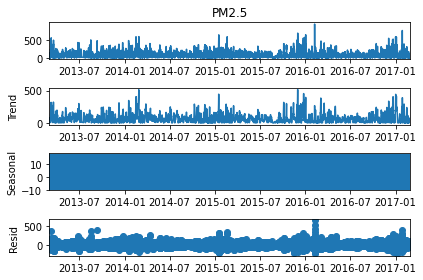

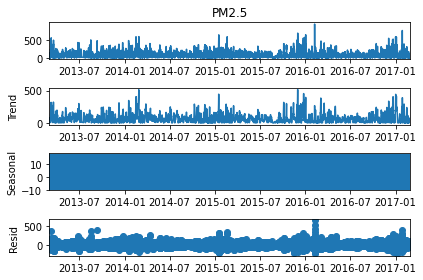

In [14]:
# if there is a daily pattern ?

decomposeResult_daily = seasonal_decompose(data5['PM2.5'], period = 24)
decomposeResult_daily.plot()

C:\StudySoftware\Anaconda\envs\info-6105_final\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\StudySoftware\Anaconda\envs\info-6105_final\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\StudySoftware\Anaconda\envs\info-6105_final\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

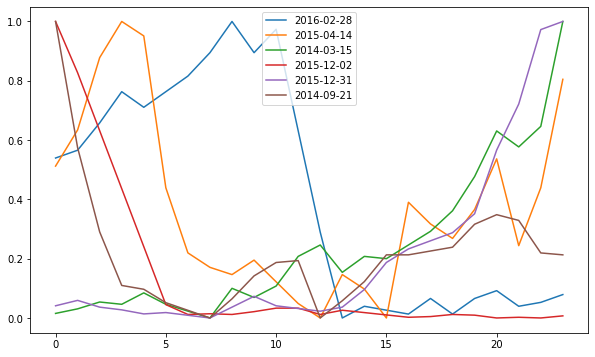

In [15]:
# seems like no seasonality?
# try to randomly pick up some daily data and normalize it, to see if they have some trend

from datetime import timedelta
from sklearn import preprocessing

day_lapse = np.random.randint(1, 1200, size=6) 
scaler = preprocessing.MinMaxScaler()


for lapse in day_lapse:
    # get random day
    date = data5.index[0] + timedelta(days=int(lapse))
    datestring = date.strftime('%Y-%m-%d')
    # selected data within this day
    df_daily = data5[data5.index.strftime('%Y-%m-%d') == datestring]
        # print(df_daily)
    # normalize data
    scaled = scaler.fit_transform(df_daily)
    df_daily['PM2.5'] = scaled
    df_daily.rename(columns={'PM2.5':datestring },inplace=True)
    df_daily.reset_index(inplace=True)
    df_daily.drop(columns=['date'], inplace=True)
        # print(df_daily)
    # plot data
    df_daily[datestring].plot(legend=True, figsize=(10,6))
    
    



C:\StudySoftware\Anaconda\envs\info-6105_final\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\StudySoftware\Anaconda\envs\info-6105_final\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\StudySoftware\Anaconda\envs\info-6105_final\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

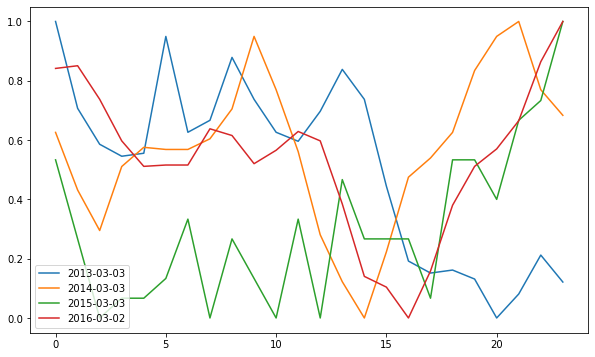

In [16]:
# it seems like there is no daily pattern??
# try same day on different year
from datetime import timedelta
from sklearn import preprocessing

year_lapse = [0, 1, 2, 3]
scaler = preprocessing.MinMaxScaler()


for lapse in year_lapse:
    # get random day
    date = data5.index[50] + timedelta(days=int(lapse * 365))
    datestring = date.strftime('%Y-%m-%d')
    # selected data within this day
    df_daily = data5[data5.index.strftime('%Y-%m-%d') == datestring]
        # print(df_daily)
    # normalize data
    scaled = scaler.fit_transform(df_daily)
    df_daily['PM2.5'] = scaled
    df_daily.rename(columns={'PM2.5':datestring },inplace=True)
    df_daily.reset_index(inplace=True)
    df_daily.drop(columns=['date'], inplace=True)
        # print(df_daily)
    # plot data
    df_daily[datestring].plot(legend=True, figsize=(10,6))


In [17]:
df_temp = data4[data4.index.strftime('%Y-%m-%d') == '2015-03-03']
df_temp

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,
2015-03-03 00:00:00,12.0,7.2,1012.9,-17.8,0.0,NW,3.8
2015-03-03 01:00:00,8.0,6.4,1013.6,-18.4,0.0,NW,3.6
2015-03-03 02:00:00,4.0,5.3,1014.8,-19.3,0.0,WNW,5.0
2015-03-03 03:00:00,5.0,4.0,1016.1,-21.2,0.0,NW,5.0
2015-03-03 04:00:00,5.0,3.3,1016.6,-25.5,0.0,NW,6.2
2015-03-03 05:00:00,6.0,2.2,1017.6,-27.5,0.0,NNW,4.5
2015-03-03 06:00:00,9.0,1.2,1018.7,-26.1,0.0,NW,6.3
2015-03-03 07:00:00,4.0,-1.0,1020.1,-26.0,0.0,WNW,8.2
2015-03-03 08:00:00,8.0,-2.0,1021.8,-24.5,0.0,WNW,7.0


In [18]:


# plot PM2.5 with different weather condition (normalize all columns)

data6 = data4.drop(columns=['wd'])
data6_n =((data6-data6.min())/(data6.max()-data6.min()))
data6_n

,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,
2013-03-01 00:00:00,0.001065,0.277003,0.689781,0.244094,0.0,0.726562
2013-03-01 01:00:00,0.010650,0.273519,0.695255,0.231496,0.0,0.734375
2013-03-01 02:00:00,0.012780,0.263066,0.697080,0.204724,0.0,0.671875
2013-03-01 03:00:00,0.010650,0.256098,0.717153,0.200000,0.0,0.515625
2013-03-01 04:00:00,0.010650,0.250871,0.724453,0.206299,0.0,0.351562
...,...,...,...,...,...,...
2017-02-28 19:00:00,0.026624,0.472125,0.478102,0.371654,0.0,0.140625
2017-02-28 20:00:00,0.047923,0.463415,0.483577,0.411024,0.0,0.117188
2017-02-28 21:00:00,0.017039,0.451220,0.485401,0.366929,0.0,0.132812


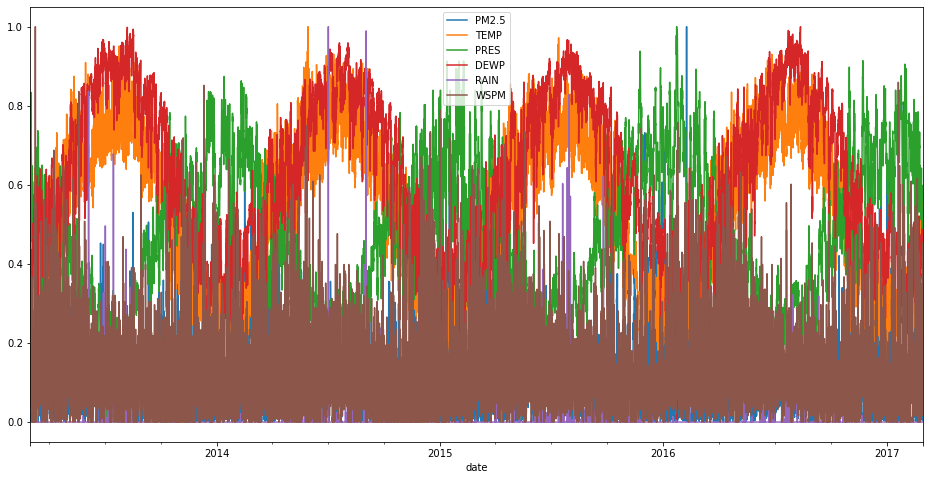

In [19]:
data6_n.plot(figsize=(16,8))

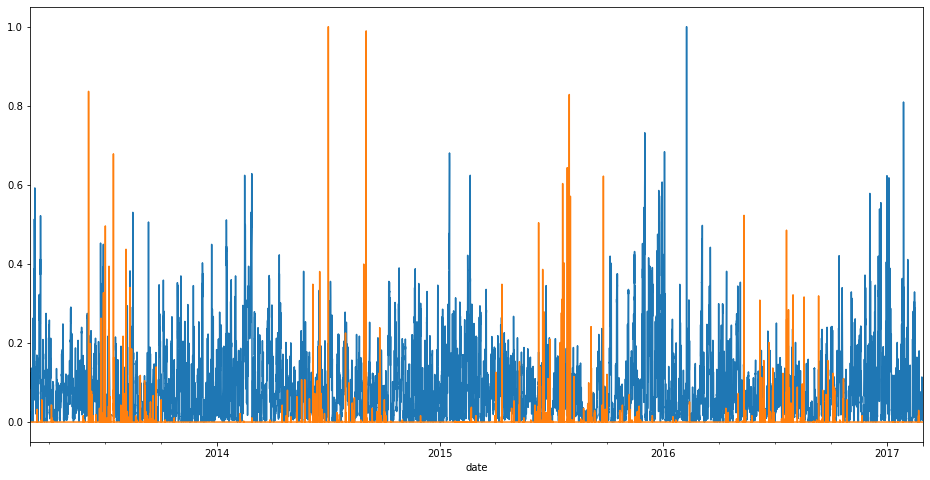

In [20]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['RAIN'].plot()

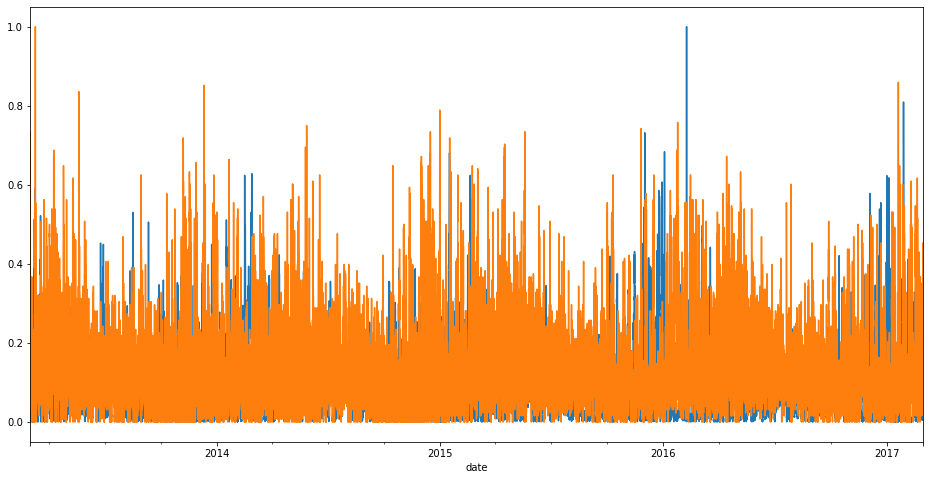

In [21]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['WSPM'].plot()